In [44]:
import cv2
from pathlib import Path
import pandas as pd
import numpy as np
from skimage.draw import polygon
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src')
import utils

In [45]:
# Example video path from your CSV
file_name = '0X35A5E9C9075E56EE.avi'
video_path = f'/home/paul/Downloads/EchoNet-Dynamic/Videos/' + file_name
video_tensor = utils.avi2video(video_path)
video_tensor.shape

(281, 112, 112)

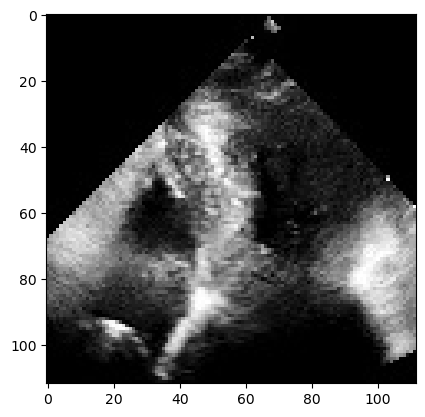

In [46]:
plt.imshow(video_tensor[50], cmap='gray')

In [47]:
# read the tracings csv and extract the correct file
path_tracings_csv = '/home/paul/Downloads/EchoNet-Dynamic/VolumeTracings.csv'
df_tracings = pd.read_csv(path_tracings_csv)


In [49]:
df_tracings['Frame'].min()

0

In [25]:
# df_tracings.head()

In [26]:
test_subject_tracings = df_tracings[df_tracings['FileName'] == file_name]
# test_subject_tracings.head()

In [29]:
df_ed, df_es, frame_ed, frame_es = utils.extract_ed_es_tracings(df_tracings, file_name)

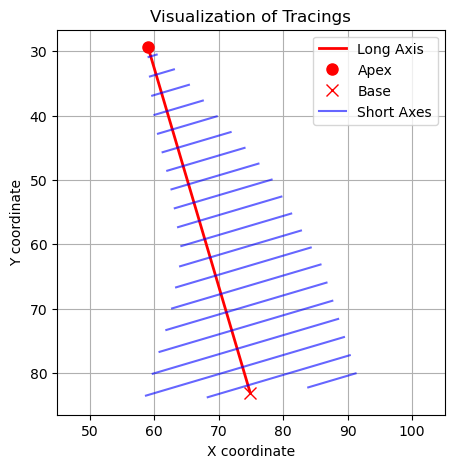

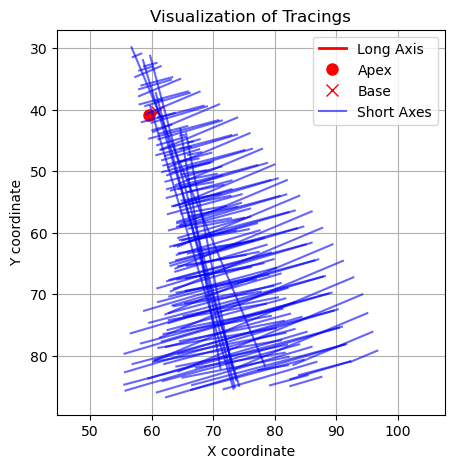

In [30]:
utils.plot_long_short_axis(df_ed)
utils.plot_long_short_axis(df_es)

In [31]:
len(df_es)

147

In [32]:
mask_ed = utils.binary_mask_from_tracings(df_ed)
mask_es = utils.binary_mask_from_tracings(df_es)

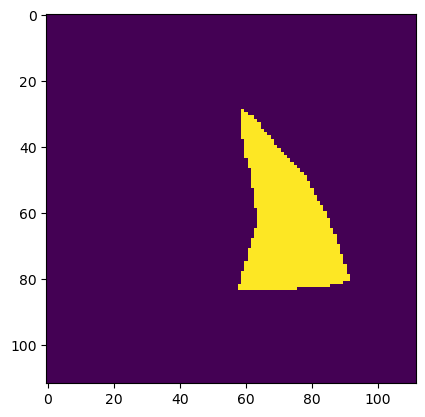

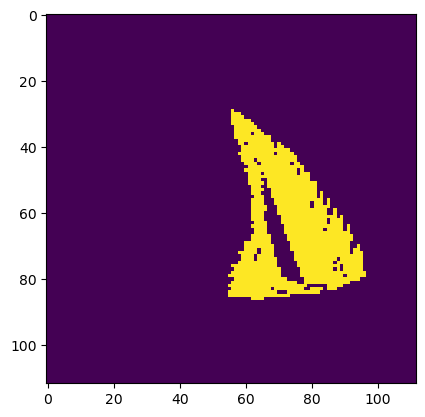

In [33]:
plt.imshow(mask_ed)
plt.show()
plt.imshow(mask_es)
plt.show()

In [34]:

traces_mask_ed = utils.extract_lv_axes(mask_ed)
traces_mask_es = utils.extract_lv_axes(mask_es)
# utils.plot_long_short_axis(traces_mask_ed)

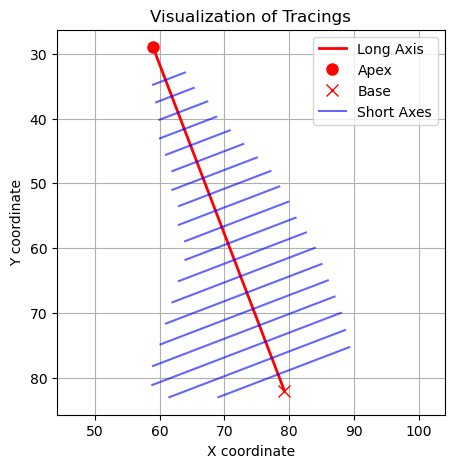

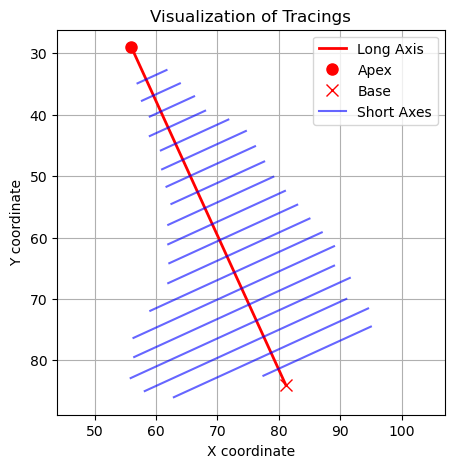

In [35]:
utils.plot_long_short_axis(traces_mask_ed)
utils.plot_long_short_axis(traces_mask_es)

In [36]:
# compare volume estimation and ejection fraction estimation 

## from the original 
vol_ed_orig = utils.calculate_volume_from_tracings(df_ed)
vol_es_orig = utils.calculate_volume_from_tracings(df_es)

# GT LVEF
lvef_gt = (vol_ed_orig - vol_es_orig) / vol_ed_orig



# from the masks 
vol_ed_mask = utils.calculate_volume_from_tracings(traces_mask_ed)
vol_es_mask = utils.calculate_volume_from_tracings(traces_mask_es)

# GT LVEF
lvef_mask = (vol_ed_mask - vol_es_mask) / vol_ed_mask

print('GT lvef:', lvef_gt)
print('Mask lvef:', lvef_mask)

GT lvef: 0.972165323752951
Mask lvef: -0.5921344753719082


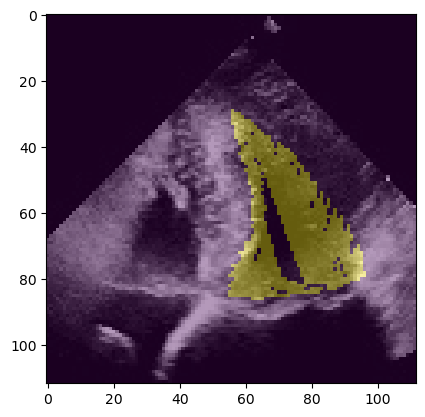

In [43]:
plt.imshow(video_tensor[frame_ed-1], cmap='gray')
plt.imshow(mask_ed, alpha=0.4)